<a href="https://colab.research.google.com/github/md-zihad/3200-Lab/blob/main/ML_Lab_Works30_09_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library Installation**

In [ ]:
!pip install xlrd
!pip install openpyxl
!pip install -U scikit-learn
!pip install tensorflow
!pip install scikeras
!pip install eli5
!pip install scikit-learn==0.24.2
!pip install --upgrade eli5
!pip install unidecode


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.4 MB/s eta 0:00:00


# **Import Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import h5py
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Flatten, Bidirectional
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier  # Use only scikeras wrapper
from sklearn.model_selection import train_test_split
from keras import regularizers
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
# import eli5
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
import glob
from gensim.models.phrases import Phrases, Phraser
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from time import time
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import permutation_importance



# **Load Dataset**

In [ ]:
df_train=pd.read_csv("/content/ML_train.csv")
df_test=pd.read_csv("/content/ML_test.csv")

display(df_train)
display(df_test)

,category,text,cleanText
0,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
1,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
2,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
3,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
4,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
...,...,...,...
17160,NaN,NaN,NaN
17161,NaN,NaN,NaN
17162,NaN,NaN,NaN
17163,NaN,NaN,NaN


,category,text,cleanText
0,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
1,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
2,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
3,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
4,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ অনেক গভীর
...,...,...,...
17160,NaN,NaN,NaN
17161,NaN,NaN,NaN
17162,NaN,NaN,NaN
17163,NaN,NaN,NaN


# **Preprocessing**

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

# **Stopwords Removal**

In [ ]:
data1 =pd.read_excel('/content/stopwords_bangla.xlsx')
display(data1)
stop = data1['words'].tolist()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))
df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# **Stemming**

In [ ]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

# **Changing Labels to Numbers**

In [ ]:
df_train["category"].replace({"neutral": "0", "positive": "1","negative": "2"}, inplace=True)
df_test["category"].replace({"neutral": "0", "positive": "1","negative": "2"}, inplace=True)
display(df_train)
display(df_test)

,category,text,cleanText
0,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
1,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
2,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
3,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
4,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
...,...,...,...
17160,NaN,NaN,nan
17161,NaN,NaN,nan
17162,NaN,NaN,nan
17163,NaN,NaN,nan


,category,text,cleanText
0,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
1,Positive,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
2,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
3,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
4,Negative,গানটির অর্থ অনেক গভীর,গানটির অর্থ গভীর
...,...,...,...
17160,NaN,NaN,nan
17161,NaN,NaN,nan
17162,NaN,NaN,nan
17163,NaN,NaN,nan


# **Removing Null values**

In [ ]:
df_train = df_train.dropna()
df_test = df_test.dropna()

# **Removing Small Texts**

In [ ]:
df_train['count'] = df_train['cleanText'].str.split().str.len()
df_test['count'] = df_test['cleanText'].str.split().str.len()
# Remove the text with words less than 5
df_train= df_train.loc[df_train['count']>5]
df_test= df_test.loc[df_test['count']>5]

<ipython-input-26-273a42526250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['count'] = df_test['cleanText'].str.split().str.len()


# **Feature Extraction with TFIDF**

In [ ]:
text_transformer = TfidfVectorizer(ngram_range=(1, 3),lowercase=True, max_features=10000)
#%%time
X_train_text = text_transformer.fit_transform(df_train['cleanText'].values)
X_test_text = text_transformer.transform(df_test['cleanText'].values)

In [ ]:
logit = LogisticRegression(C=.95,penalty='l2',solver='saga', multi_class='multinomial', random_state=17, n_jobs=4)

In [ ]:
model=logit.fit(X_train_text, df_train['category'].values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# **Model Creation of Multinomial Naive Bayes**

In [ ]:
nb=MultinomialNB(alpha=1.5)

In [ ]:
model=nb.fit(X_train_text, df_train['category'].values)

# **Logistic Regression Evaluation**

In [ ]:
test_preds = logit.predict(X_test_text)
test_labels=df_test['category'].values
#print(accuracy_score(test_labels,test_preds))
test_result=accuracy_score(test_labels,test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,test_preds, average='weighted')

score = model.score(X_test_text,test_labels)
print(score)

print("Testing Accuracy: "+str(test_result))

print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

0.5919963201471942
Testing Accuracy: 0.6904323827046918
Precision :0.7111848234282699
Recall :0.6904323827046918
fscore :0.6717941434544843


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Unique labels in test_labels:", np.unique(test_labels))
print("Unique predictions in test_preds:", np.unique(test_preds))


Unique labels in test_labels: ['Negative ' 'Neutral' 'Neutral ' 'Positive' 'Positive ' 'Positive .']
Unique predictions in test_preds: ['Negative ' 'Neutral ' 'Positive ']


In [ ]:

test_labels = [re.sub(r'[^\w\s]', '', label).strip().lower() for label in test_labels]
test_preds = [re.sub(r'[^\w\s]', '', label).strip().lower() for label in test_preds]

print("Cleaned unique labels in test_labels:", np.unique(test_labels))
print("Cleaned unique predictions in test_preds:", np.unique(test_preds))

Cleaned unique labels in test_labels: ['negative' 'neutral' 'positive']
Cleaned unique predictions in test_preds: ['negative' 'neutral' 'positive']


In [ ]:
# Strip leading/trailing spaces and standardize labels
test_labels = [label.strip().lower() for label in test_labels]
test_preds = [label.strip().lower() for label in test_preds]

# Inspect the cleaned unique labels
print("Cleaned unique labels in test_labels:", np.unique(test_labels))
print("Cleaned unique predictions in test_preds:", np.unique(test_preds))


Cleaned unique labels in test_labels: ['negative' 'neutral' 'positive']
Cleaned unique predictions in test_preds: ['negative' 'neutral' 'positive']


,precision,recall,f1-score,support
negative,71.04,56.74,63.09,3139.000000
neutral,65.19,5.17,9.57,1994.000000
positive,54.30,91.92,68.27,3563.000000
accuracy,59.33,59.33,59.33,0.593261
macro avg,63.51,51.27,46.98,8696.000000
weighted avg,62.84,59.33,52.94,8696.000000


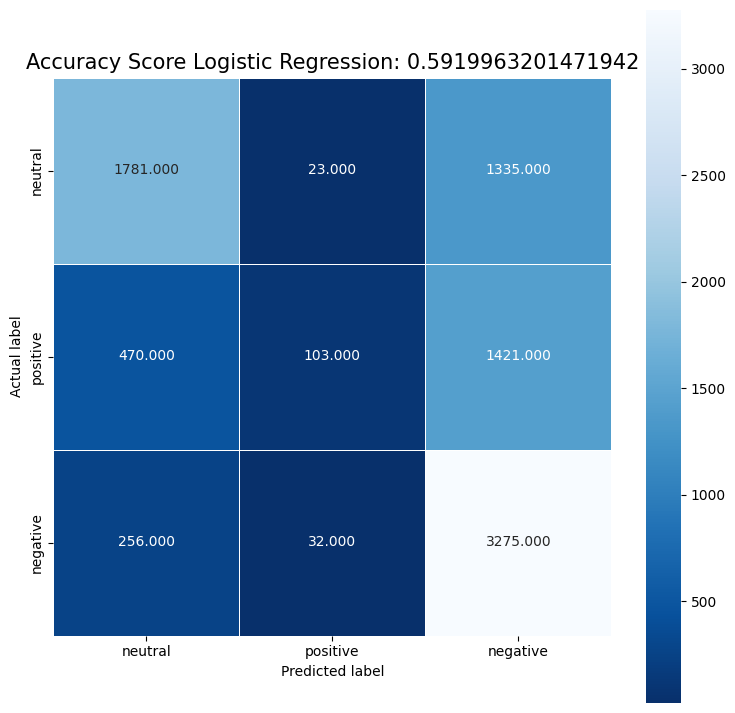

In [ ]:
cm = metrics.confusion_matrix(test_labels,test_preds)
plt.figure(figsize=(9,9))
cm_df = pd.DataFrame(cm,index = ['neutral' ,'positive' ,'negative'],
                     columns = ['neutral' ,'positive' ,'negative'])

sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Logistic Regression: {0}'.format(score)
plt.title(all_sample_title, size = 15);

report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = test_preds, output_dict=True)).transpose()
report = report.rename(index={'0': 'neutral','1':'positive','2':'negative'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

# **Multinomial Naive Bayes Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Score: 0.59
Testing Accuracy: 0.59
Precision: 0.63
Recall: 0.59
F-score: 0.53


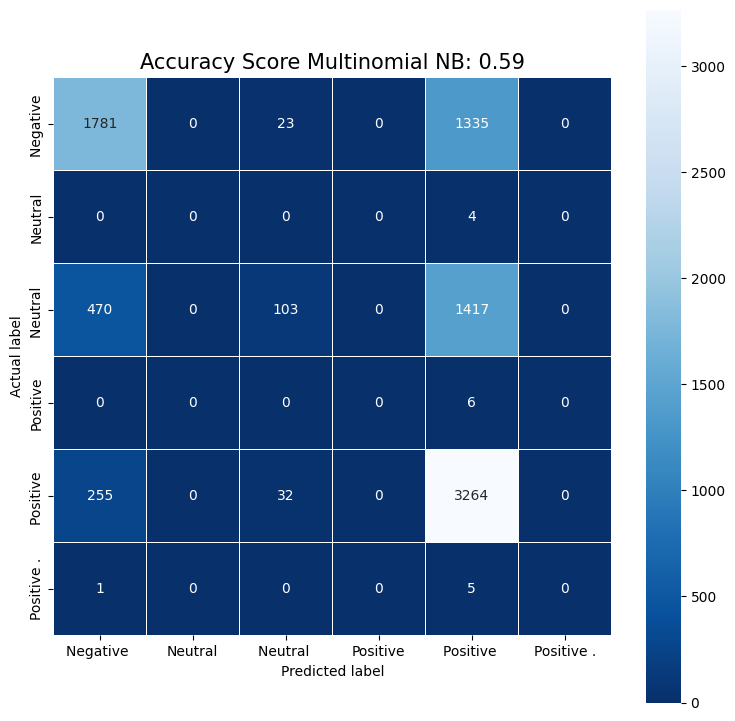

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Negative,71.04,56.74,63.09,3139.000000
Neutral,0.00,0.00,0.00,4.000000
Neutral,65.19,5.18,9.59,1990.000000
Positive,0.00,0.00,0.00,6.000000
Positive,54.12,91.92,68.13,3551.000000
Positive .,0.00,0.00,0.00,6.000000
accuracy,59.20,59.20,59.20,0.591996
macro avg,31.73,25.64,23.47,8696.000000
weighted avg,62.66,59.20,52.79,8696.000000


In [ ]:

test_preds = nb.predict(X_test_text)
test_labels = df_test['category'].values

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = model.score(X_test_text, test_labels)

print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))

cm = metrics.confusion_matrix(test_labels, test_preds)

class_names = sorted(set(test_labels))

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score Multinomial NB: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

# Classification report
report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()

# Convert precision, recall, and f1-score to percentage
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))

# Display the classification report
display(report)


no need


In [ ]:
# Check unique labels in test_labels and test_preds
unique_labels = np.unique(test_labels)
unique_preds = np.unique(test_preds)

print("Unique labels in test_labels:", unique_labels)
print("Unique predictions in test_preds:", unique_preds)


Unique labels in test_labels: ['Negative ' 'Neutral' 'Neutral ' 'Positive' 'Positive ' 'Positive .']
Unique predictions in test_preds: ['Negative ' 'Neutral ' 'Positive ']


In [ ]:
# Clean the labels and predictions
test_labels = [label.strip().lower() for label in test_labels]
test_preds = [pred.strip().lower() for pred in test_preds]

cleaned_unique_labels = np.unique(test_labels)
cleaned_unique_preds = np.unique(test_preds)

print("Cleaned unique labels in test_labels:", cleaned_unique_labels)
print("Cleaned unique predictions in test_preds:", cleaned_unique_preds)

Cleaned unique labels in test_labels: ['negative' 'neutral' 'positive' 'positive .']
Cleaned unique predictions in test_preds: ['negative' 'neutral' 'positive']


# **ID3 Implementation**

Model Score: 0.94
Testing Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F-score: 0.94


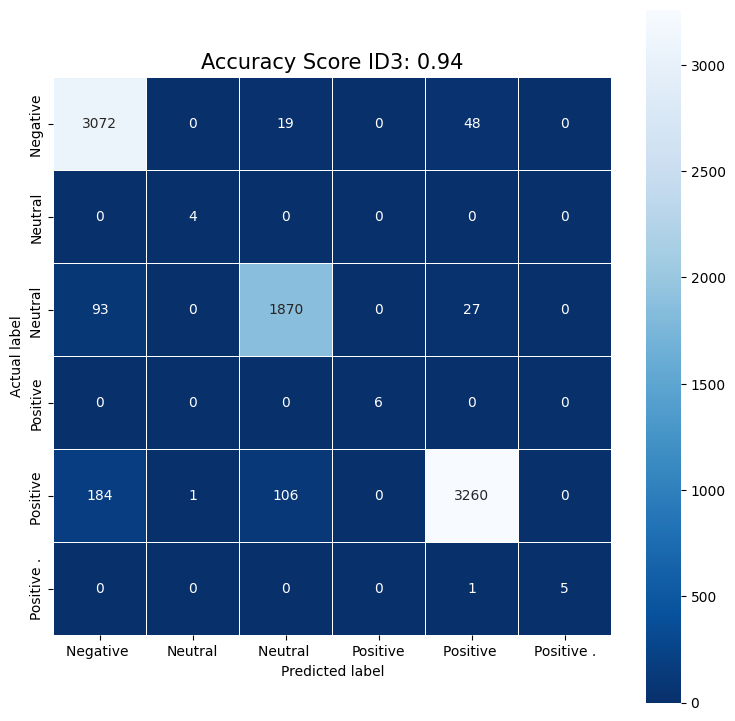

,precision,recall,f1-score,support
Negative,91.73,97.87,94.70,3139.000000
Neutral,80.00,100.00,88.89,4.000000
Neutral,93.73,93.97,93.85,1990.000000
Positive,100.00,100.00,100.00,6.000000
Positive,97.72,91.81,94.67,3551.000000
Positive .,100.00,83.33,90.91,6.000000
accuracy,94.49,94.49,94.49,0.944917
macro avg,93.86,94.50,93.84,8696.000000
weighted avg,94.64,94.49,94.49,8696.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_text = df_train['text'].values  # Your feature data
y_train = df_train['category'].values  # Your label data

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text)

id3_model = DecisionTreeClassifier(criterion='entropy')

id3_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text)
test_labels = df_test['category'].values

test_preds = id3_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = id3_model.score(X_test_vectorized, test_labels)

# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))

# Create confusion matrix
cm = confusion_matrix(test_labels, test_preds)

class_names = sorted(set(test_labels))

# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score ID3: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()

# Convert precision, recall, and f1-score to percentage
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))
display(report)

# **C4.5 Implementation**



In [ ]:
!!pip install sklearn-c4.5


['\x1bERROR: Could not find a version that satisfies the requirement sklearn-c4.5 (from versions: none)\x1b\x1b',
 '\x1b\x1bERROR: No matching distribution found for sklearn-c4.5\x1b\x1b',
 '\x1b']

Model Score: 0.94
Testing Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F-score: 0.94


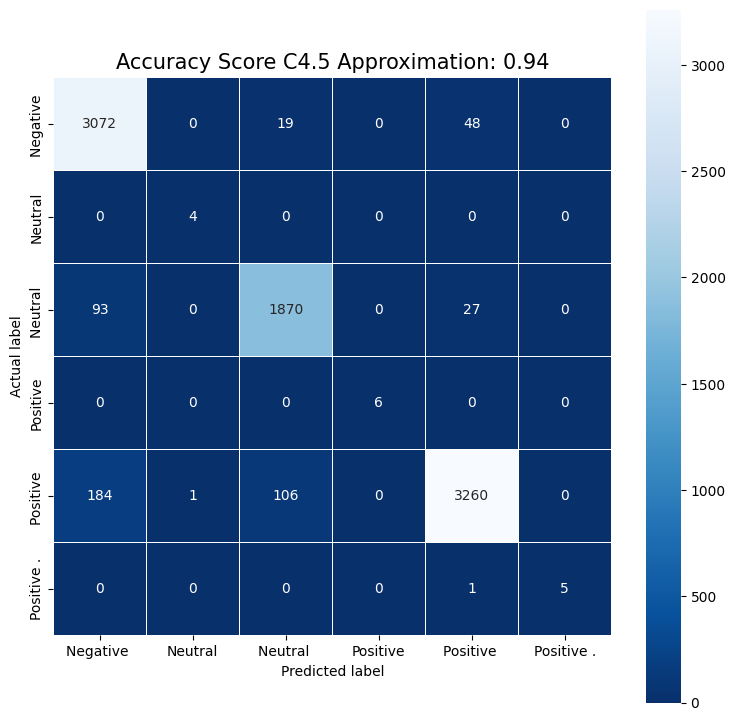

,precision,recall,f1-score,support
Negative,91.73,97.87,94.70,3139.000000
Neutral,80.00,100.00,88.89,4.000000
Neutral,93.73,93.97,93.85,1990.000000
Positive,100.00,100.00,100.00,6.000000
Positive,97.72,91.81,94.67,3551.000000
Positive .,100.00,83.33,90.91,6.000000
accuracy,94.49,94.49,94.49,0.944917
macro avg,93.86,94.50,93.84,8696.000000
weighted avg,94.64,94.49,94.49,8696.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_text = df_train['text'].values
y_train = df_train['category'].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text)

c45_approx_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

c45_approx_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text)
test_labels = df_test['category'].values

test_preds = c45_approx_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = c45_approx_model.score(X_test_vectorized, test_labels)

# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))

# Create confusion matrix
cm = confusion_matrix(test_labels, test_preds)

class_names = sorted(set(test_labels))
# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score C4.5 Approximation: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()
# Classification report
report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()

report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))

display(report)

# **CART Implementation**


Model Score: 0.94
Testing Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F-score: 0.94


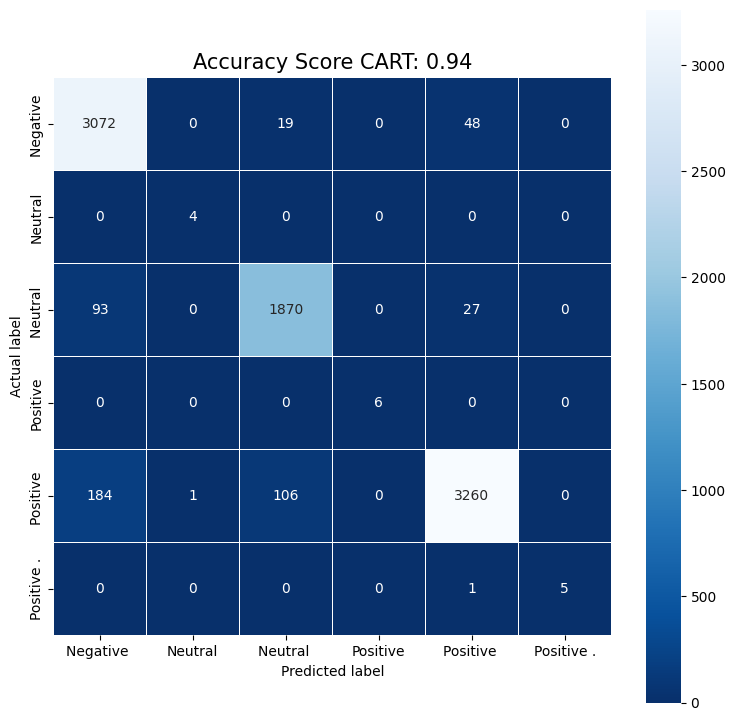

,precision,recall,f1-score,support
Negative,91.73,97.87,94.70,3139.000000
Neutral,80.00,100.00,88.89,4.000000
Neutral,93.73,93.97,93.85,1990.000000
Positive,100.00,100.00,100.00,6.000000
Positive,97.72,91.81,94.67,3551.000000
Positive .,100.00,83.33,90.91,6.000000
accuracy,94.49,94.49,94.49,0.944917
macro avg,93.86,94.50,93.84,8696.000000
weighted avg,94.64,94.49,94.49,8696.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_text = df_train['text'].values
y_train = df_train['category'].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text)

cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)

cart_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text)
test_labels = df_test['category'].values

test_preds = cart_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = cart_model.score(X_test_vectorized, test_labels)

# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))

# Create confusion matrix
cm = confusion_matrix(test_labels, test_preds)
class_names = sorted(set(test_labels))

# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score CART: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()
# Classification report
report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()
# Convert precision, recall, and f1-score to percentage
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))
display(report)

# **SVM Implementation**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Score: 0.53
Testing Accuracy: 0.53
Precision: 0.56
Recall: 0.53
F-score: 0.47


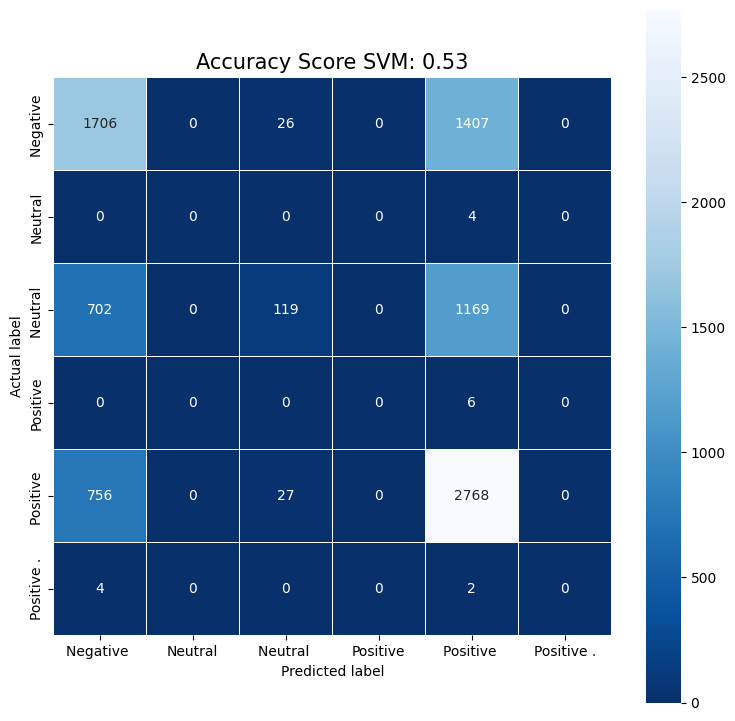

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Negative,53.85,54.35,54.10,3139.000000
Neutral,0.00,0.00,0.00,4.000000
Neutral,69.19,5.98,11.01,1990.000000
Positive,0.00,0.00,0.00,6.000000
Positive,51.68,77.95,62.15,3551.000000
Positive .,0.00,0.00,0.00,6.000000
accuracy,52.82,52.82,52.82,0.528174
macro avg,29.12,23.05,21.21,8696.000000
weighted avg,56.37,52.82,47.43,8696.000000


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_text = df_train['text'].values
y_train = df_train['category'].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text)

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text)
test_labels = df_test['category'].values

test_preds = svm_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = svm_model.score(X_test_vectorized, test_labels)

# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))

# Create confusion matrix
cm = confusion_matrix(test_labels, test_preds)
class_names = sorted(set(test_labels))
# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score SVM: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))
display(report)

# **K-NN Implementation**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Score: 0.60
Testing Accuracy: 0.60
Precision: 0.60
Recall: 0.60
F-score: 0.59


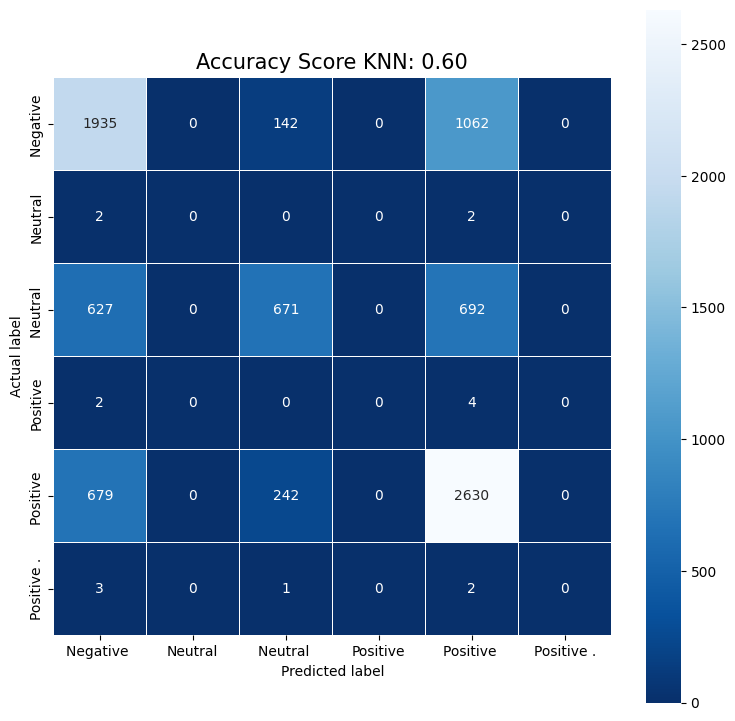

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Negative,59.58,61.64,60.59,3139.000000
Neutral,0.00,0.00,0.00,4.000000
Neutral,63.54,33.72,44.06,1990.000000
Positive,0.00,0.00,0.00,6.000000
Positive,59.88,74.06,66.22,3551.000000
Positive .,0.00,0.00,0.00,6.000000
accuracy,60.21,60.21,60.21,0.602116
macro avg,30.50,28.24,28.48,8696.000000
weighted avg,60.50,60.21,59.00,8696.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_text = df_train['text'].values
y_train = df_train['category'].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text)
test_labels = df_test['category'].values

test_preds = knn_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = knn_model.score(X_test_vectorized, test_labels)

# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))
# Create confusion matrix
cm = confusion_matrix(test_labels, test_preds)
# Define unique class names based on test_labels
class_names = sorted(set(test_labels))  # Get unique classes from test_labels
# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score KNN: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()
# Classification report
report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))
display(report)

# **Bernoulli Naive Bayes**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Score: 0.55
Testing Accuracy: 0.55
Precision: 0.57
Recall: 0.55
F-score: 0.53


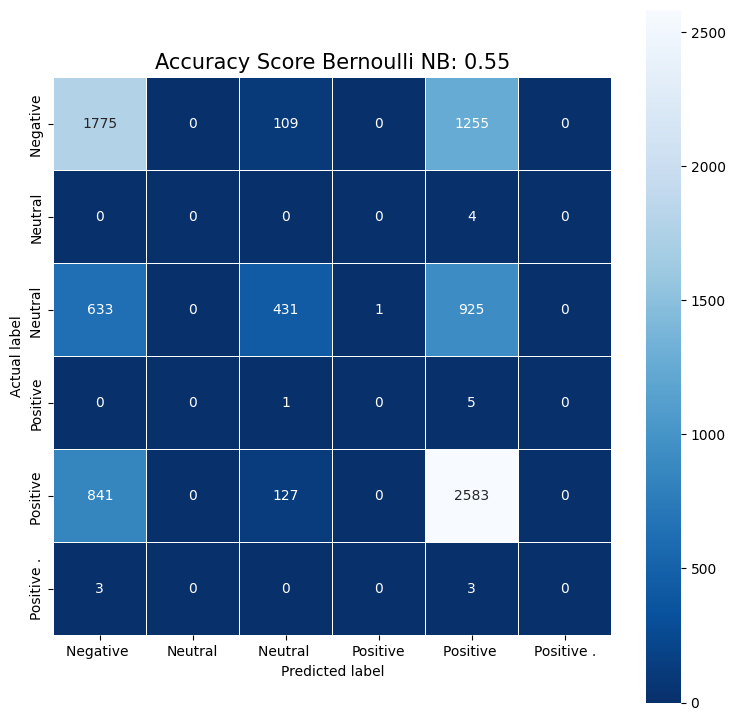

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Negative,54.58,56.55,55.55,3139.000000
Neutral,0.00,0.00,0.00,4.000000
Neutral,64.52,21.66,32.43,1990.000000
Positive,0.00,0.00,0.00,6.000000
Positive,54.09,72.74,62.05,3551.000000
Positive .,0.00,0.00,0.00,6.000000
accuracy,55.07,55.07,55.07,0.550713
macro avg,28.87,25.16,25.00,8696.000000
weighted avg,56.56,55.07,52.81,8696.000000


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_text = df_train['text'].values
y_train = df_train['category'].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(binary=True)
X_train_vectorized = vectorizer.fit_transform(X_train_text)

bnb_model = BernoulliNB()

bnb_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text)
test_labels = df_test['category'].values

test_preds = bnb_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = bnb_model.score(X_test_vectorized, test_labels)
# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))
# Step 7: Create confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Define unique class names based on test_labels
class_names = sorted(set(test_labels))
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score Bernoulli NB: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))
display(report)

# **Gaussian Naive Bayes**

Model Score: 0.39
Testing Accuracy: 0.39
Precision: 0.74
Recall: 0.39
F-score: 0.36


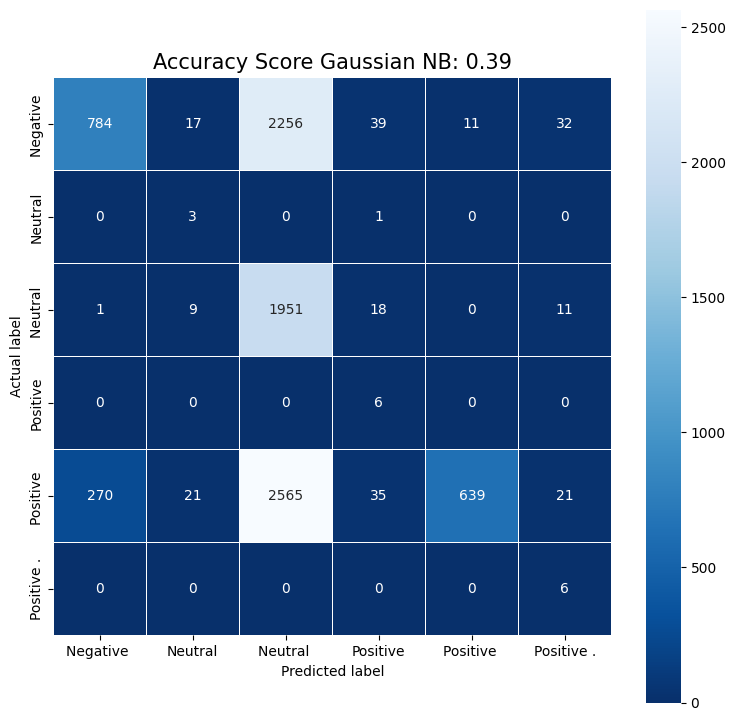

,precision,recall,f1-score,support
Negative,74.31,24.98,37.39,3139.000000
Neutral,6.00,75.00,11.11,4.000000
Neutral,28.81,98.04,44.53,1990.000000
Positive,6.06,100.00,11.43,6.000000
Positive,98.31,17.99,30.42,3551.000000
Positive .,8.57,100.00,15.79,6.000000
accuracy,38.97,38.97,38.97,0.389719
macro avg,37.01,69.34,25.11,8696.000000
weighted avg,73.57,38.97,36.13,8696.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_text = df_train['text'].values
y_train = df_train['category'].values

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_text).toarray()

gnb_model = GaussianNB()

gnb_model.fit(X_train_vectorized, y_train)

X_test_text = df_test['text'].values
X_test_vectorized = vectorizer.transform(X_test_text).toarray()
test_labels = df_test['category'].values

test_preds = gnb_model.predict(X_test_vectorized)

test_result = accuracy_score(test_labels, test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

score = gnb_model.score(X_test_vectorized, test_labels)

# Print results
print("Model Score: {:.2f}".format(score))
print("Testing Accuracy: {:.2f}".format(test_result))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))

cm = confusion_matrix(test_labels, test_preds)

class_names = sorted(set(test_labels))

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score Gaussian NB: {:.2f}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

report = pd.DataFrame(classification_report(y_true=test_labels, y_pred=test_preds, output_dict=True)).transpose()
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))
display(report)

# **Conclusion**